In [132]:
import os
os.chdir("C:/Users/Yashwanth/Desktop/Project 2")

In [133]:
# check current working directory 
os.getcwd()

'C:\\Users\\Yashwanth\\Desktop\\Project 2'

In [134]:
print(os.listdir(os.getcwd()))

['.RData', '.Rhistory', 'bank-loan.csv', 'Missing_perc.csv', 'R project.R']


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
bank =pd.read_csv("bank-loan.csv")

In [137]:
bank.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [138]:
bank.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [139]:
bank.tail(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [140]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


In [141]:
bank.shape

(850, 9)

In [142]:
bank.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


C:\Users\Yashwanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


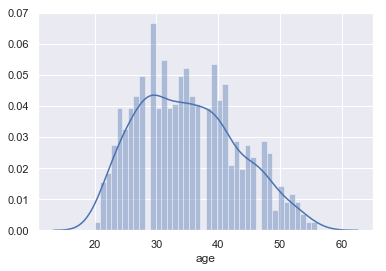

In [143]:
############ univariate analysis and bivariate analysis ##########################
# analysis for single variable in the dataset and relation between 2 variables.
sns.distplot(bank["age"], kde = True , bins = 40)

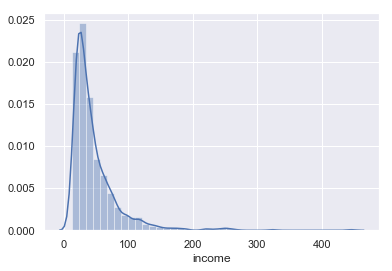

In [144]:
sns.distplot(bank["income"], kde = True , bins = 40)

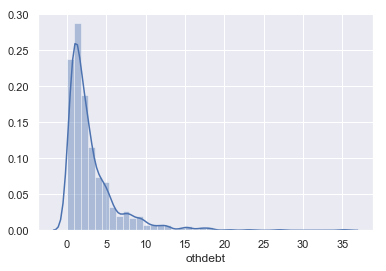

In [145]:
sns.distplot(bank["othdebt"], kde = True , bins = 40)

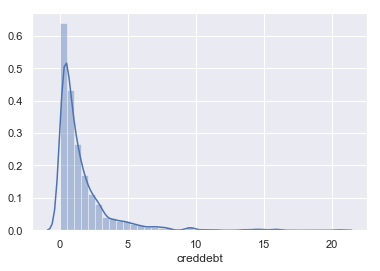

In [146]:
sns.distplot(bank["creddebt"], kde = True , bins = 40)

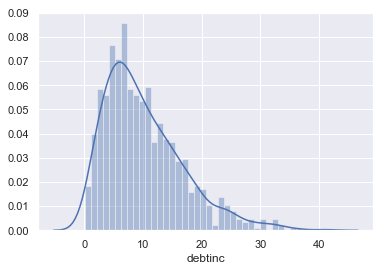

In [147]:
sns.distplot(bank["debtinc"], kde = True , bins = 40)

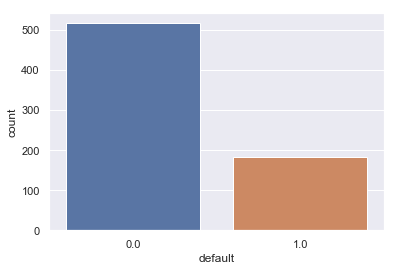

In [148]:
sns.countplot( x = "default" , data = bank)

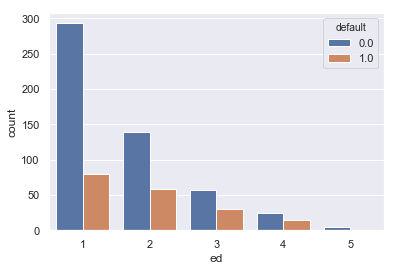

In [149]:
sns.countplot( x = "ed" , data = bank, hue = "default")

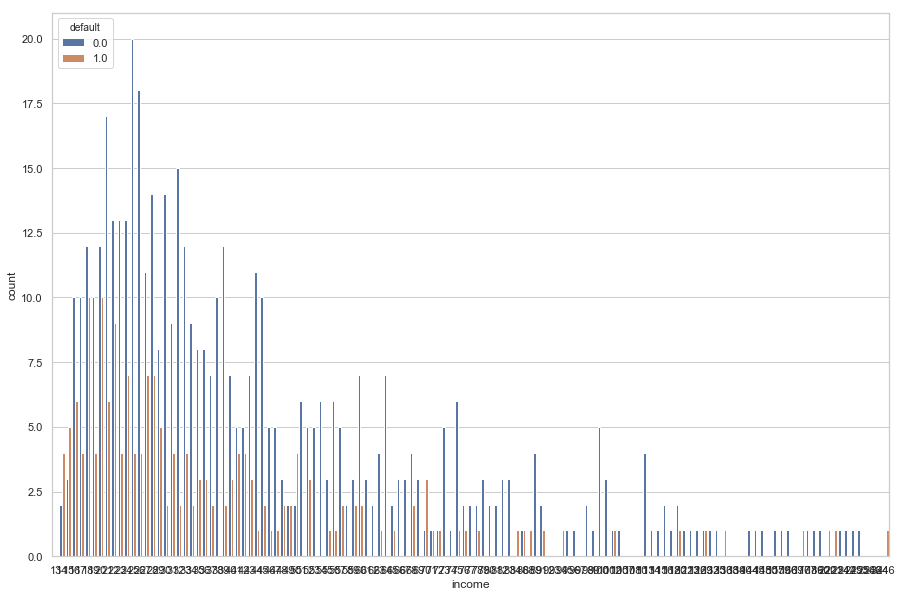

In [152]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
sns.countplot( x = "income" , data = bank, hue = "default")

In [153]:
############# missing value analysis ################

#Calculating the null values in the dataframe
missing_value = pd.DataFrame(bank.isnull().sum())
missing_value = (missing_value/len(bank))*100
missing_value.reset_index()

missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False)
#save output results 
missing_value.to_csv("Missing_perc.csv", index = False)
missing_value

,Missing_percentage
default,17.647059
age,0.000000
ed,0.000000
employ,0.000000
address,0.000000
income,0.000000
debtinc,0.000000
creddebt,0.000000
othdebt,0.000000


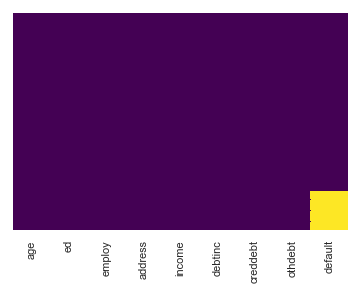

In [154]:
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [155]:
bank.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

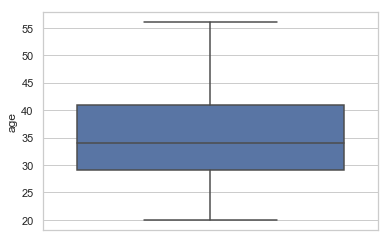

In [156]:
sns.boxplot( x = "age" , data = bank , orient = "v")

In [157]:
bank.default=bank.default.fillna(2)

In [158]:
bank.default=bank.default.astype(int)

In [159]:
bank.head(2)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0


In [160]:
bank.tail(2)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
848,35,2,1,11,24,7.8,0.417456,1.454544,2
849,37,1,20,13,41,12.9,0.899130,4.389870,2


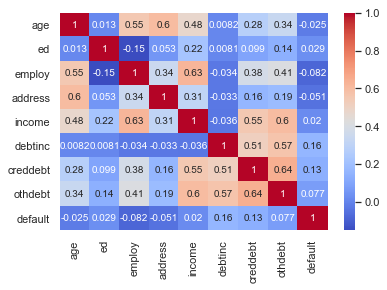

In [161]:
df_1 = bank.corr()
sns.heatmap(df_1 , annot = True , cmap = "coolwarm")

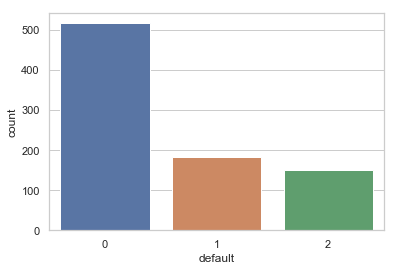

In [162]:
sns.countplot(bank.default)

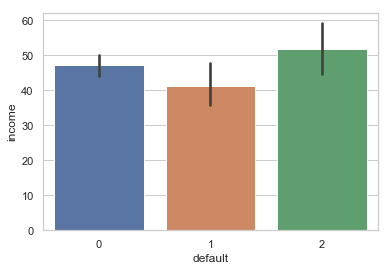

In [163]:
sns.barplot(x='default',y='income',data=bank)

In [164]:
#### selecting all missing values from dataset and we will predict those default case with best accurate 
##machine learning algorithm.
train=bank.loc[bank['default']!=2]
print(train.head(5))
print(train.tail(5))

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608        1
1   27   1      10        6      31     17.3   1.362202  4.000798        0
2   40   1      15       14      55      5.5   0.856075  2.168925        0
3   41   1      15       14     120      2.9   2.658720  0.821280        0
4   24   2       2        0      28     17.3   1.787436  3.056564        1
     age  ed  employ  address  income  debtinc  creddebt   othdebt  default
695   36   2       6       15      27      4.6  0.262062  0.979938        1
696   29   2       6        4      21     11.5  0.369495  2.045505        0
697   33   1      15        3      32      7.6  0.491264  1.940736        0
698   45   1      19       22      77      8.4  2.302608  4.165392        0
699   37   1      12       14      44     14.7  2.994684  3.473316        0


In [165]:
train.default.unique()

array([1, 0], dtype=int64)

In [166]:
test=bank.loc[bank.default==2]
test=test.iloc[:,0:8]
print(test.head(2))
print(test.tail(2))

     age  ed  employ  address  income  debtinc  creddebt   othdebt
700   36   1      16       13      32     10.9  0.544128  2.943872
701   50   1       6       27      21     12.9  1.316574  1.392426
     age  ed  employ  address  income  debtinc  creddebt   othdebt
848   35   2       1       11      24      7.8  0.417456  1.454544
849   37   1      20       13      41     12.9  0.899130  4.389870


In [167]:
X =train[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]
y = train['default']

We will seperate the data on the basis of dependent and independent variable and split it into train and test data

In [168]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

Decision tree algorithm

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 10,
                               max_depth=5, min_samples_leaf=7)
clf_gini.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [171]:
dt_pred = clf_gini.predict(Xtest)

In [172]:
dt_pred1 = clf_gini.predict_proba(Xtest)[:,1]

In [173]:
accuracy_score(ytest, dt_pred)

0.7828571428571428

In [174]:
print(classification_report(ytest, dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       132
           1       0.56      0.51      0.54        43

   micro avg       0.78      0.78      0.78       175
   macro avg       0.70      0.69      0.70       175
weighted avg       0.78      0.78      0.78       175



In [175]:
precision_dc, recall_dc, thresholds_dc = precision_recall_curve(ytest, dt_pred1)

In [176]:
fpr_dc, tpr_dc, thresholds_dc = roc_curve(ytest, dt_pred1)

# Random forest


In [177]:
clf_rf = RandomForestClassifier(random_state=42)

In [178]:
clf_rf.fit(Xtrain, ytrain)

C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
y_pred_rf = clf_rf.predict(Xtest)

In [29]:
cv_scores = cross_val_score(clf_rf, Xtrain, ytrain, cv = 5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.7714285714285715


In [30]:
cv_scores = cross_val_score(clf_rf, Xtrain, ytrain, cv = 5, scoring = 'roc_auc')
print("Average 5-Fold CV Score using ROC scoring: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score using ROC scoring: 0.7528293135435994


In [31]:
accuracy_score(ytest, y_pred_rf)

0.7542857142857143

In [32]:
n_space = np.array([5, 6, 10, 12, 15, 50, 100, 200, 500])
criterion_vals = ['gini', 'entropy']
max_features_vals = ['auto', 'sqrt', 'log2']
min_samples_leaf_sp = [1,5,10,25,50]
bootstrap_sp = [True, False]


param_grid = {'n_estimators': n_space, 'criterion' : criterion_vals, 
              'max_features':max_features_vals, 'min_samples_leaf': min_samples_leaf_sp, 
              'bootstrap': bootstrap_sp}

In [33]:
rf_clf_tuning = GridSearchCV(clf_rf, param_grid, cv=5)

In [34]:
rf_clf_tuning.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([  5,   6,  10,  12,  15,  50, 100, 200, 500]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 5, 10, 25, 50], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print("Tuned RF Parameters: {}".format(rf_clf_tuning.best_params_)) 
print("Best score is {}".format(rf_clf_tuning.best_score_))

Tuned RF Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 200}
Best score is 0.8019047619047619


In [38]:
best_rf_clf = RandomForestClassifier(criterion = 'gini', bootstrap = True, 
                                     max_features = 'log2', min_samples_leaf = 5, n_estimators = 200)

In [39]:
best_rf_clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
y_best_rf_preds = best_rf_clf.predict(Xtest)

In [41]:
cv_scores = cross_val_score(best_rf_clf, Xtrain, ytrain, cv = 5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.7847619047619048


In [42]:
accuracy_score(ytest, y_best_rf_preds)

0.8057142857142857

In [64]:
y_best_rf_probas = best_rf_clf.predict_proba(Xtest)[:,1]

In [44]:
print(classification_report(ytest, (y_best_rf_probas > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       132
           1       0.66      0.44      0.53        43

   micro avg       0.81      0.81      0.81       175
   macro avg       0.75      0.68      0.70       175
weighted avg       0.79      0.81      0.79       175



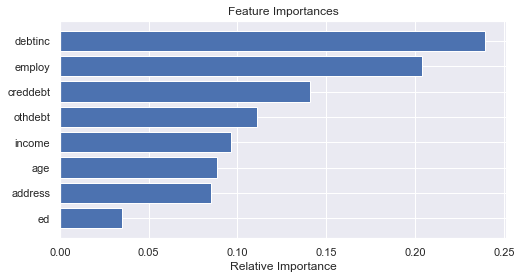

In [51]:
fig, ax = plt.subplots(figsize=(8,4))
features = train.columns
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [56]:
y_rf_probs = clf_rf.predict_proba(Xtest)

In [86]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytest, y_best_rf_probas)

In [87]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, y_best_rf_probas)

# logistic regression
basic approach to classification in supervised learning.
Assumptions = that data has no outliers, there are two classes to be predicted, and that no two independent variables are highly correlated to each other.

In [179]:
clf_log = LogisticRegression()

In most data sets, we will have features with highly varying range, units and magnitudes. Features with greater magnitudes will carry a greater vaule than those with low magnitudes. To nullify this effect, feature scaling is performed.

In [180]:
train_scale = scale(train)

C:\Users\Yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [181]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [182]:
clf_log.fit(Xtrain, ytrain)

C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
y_log_pred = clf_log.predict(Xtest)

In [184]:
accuracy_score(ytest, y_log_pred)

0.8571428571428571

In [185]:
C_space = np.array([0.0001, 0.001, 0.1, 1])

In [186]:
param_grid = {'C': C_space}

In [190]:
clf_log_tuning = GridSearchCV(clf_log, param_grid, cv=5)

In [191]:
clf_log_tuning.fit(Xtrain, ytrain)

C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-04, 1.e-03, 1.e-01, 1.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [198]:
print("Tuned Logistic Regression Parameters: {}".format(clf_log_tuning .best_params_)) 
print("Best score is {}".format(clf_log_tuning .best_score_))

Tuned Logistic Regression Parameters: {'C': 1.0}
Best score is 0.7904761904761904


Using Logistic Regression, we achieved a training set accuracy of ~79% (in terms of training set accuracy alone.)

Next, the model will be fit with the best parameter of C and then it will be used to predict the test set.

In [193]:
clf_log = LogisticRegression(C = 1.0)

In [194]:
clf_log.fit(Xtrain, ytrain)

C:\Users\Yashwanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [195]:
y_preds = clf_log.predict(Xtest)

In [196]:
p_clf_log_ba = clf_log.predict_proba(Xtest)

In [197]:
accuracy_score(ytest, y_preds)

0.8571428571428571

In [82]:
print(classification_report(ytest, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       132
           1       0.78      0.58      0.67        43

   micro avg       0.86      0.86      0.86       175
   macro avg       0.83      0.76      0.79       175
weighted avg       0.85      0.86      0.85       175



In [83]:
precision_lg, recall_lg, thresholds_lg = precision_recall_curve(ytest, p_clf_log_ba[:, 1])

In [84]:
fpr_lg, tpr_lg, thresholds_lg = roc_curve(ytest, p_clf_log_ba[:, 1])

Text(0.5, 1.0, 'Precision vs. Recall curve')

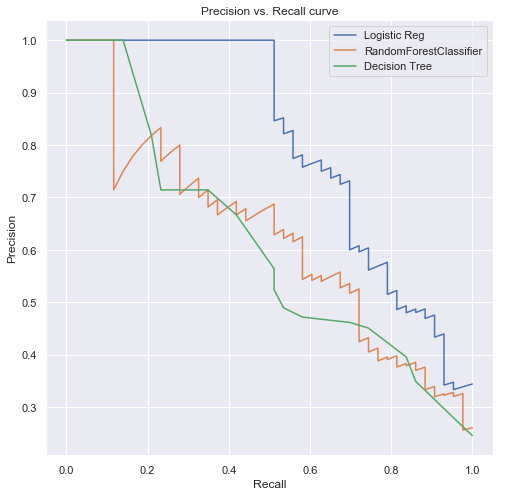

In [125]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(recall_lg, precision_lg)
plt.plot(recall_rf, precision_rf)
plt.plot(recall_dc, precision_dc)
plt.legend(('Logistic Reg', 'RandomForestClassifier', 'Decision Tree'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall curve')

In [128]:
area_log_reg = auc(recall_lg, precision_lg)
print(area_log_reg)
area_rf = auc(recall_rf, precision_rf)
print(area_rf)
area_dc = auc(recall_dc, precision_dc)
print(area_dc)

0.8011770322280233
0.6238741450756112
0.6083448382291768


Text(0.5, 1.0, 'ROC Curves')

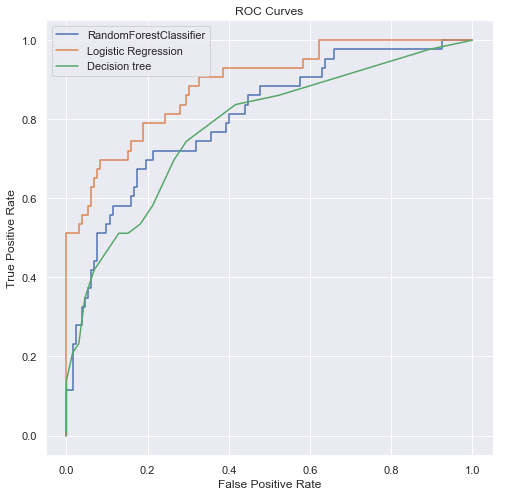

In [127]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_lg, tpr_lg)
plt.plot(fpr_dc, tpr_dc)
plt.legend(('RandomForestClassifier','Logistic Regression' , 'Decision tree'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

In [129]:
Areas_ROC_decision = roc_auc_score(ytest, dt_pred1)
Areas_ROC_logistic  = roc_auc_score(ytest, p_clf_log_ba[:, 1])
Areas_ROC_randomforest = roc_auc_score(ytest, y_best_rf_probas)
print(Areas_ROC_decision)
print(Areas_ROC_logistic)
print(Areas_ROC_randomforest)

0.7791578576462297
0.8879492600422833
0.8053206483439042
